In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/train.csv')

In [ ]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

>We aim to build a supervised machine learning model to predict the presence of coronary artery disease using structured clinical features.
>
>The model will output calibrated probabilities and will be optimized primarily for recall and PR-AUC to minimize false negatives.
>
>The solution will be developed with full pipeline integrity to prevent data leakage and ensure deployment readiness.

In [ ]:
df.shape

(85066, 15)

In [ ]:
df.dtypes

,0
id,int64
Age,int64
Sex,int64
Chest pain type,int64
BP,float64
Cholesterol,float64
FBS over 120,float64
EKG results,float64
Max HR,float64
Exercise angina,float64


In [ ]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [ ]:
df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,85066.000000,85066.000000,85066.000000,85066.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000,85065.000000
mean,42532.500000,54.134237,0.715303,3.315179,130.574420,245.100135,0.079139,0.976183,152.807759,0.271863,0.713599,1.455346,0.455193,4.619420
std,24556.583337,8.269795,0.451272,0.849995,15.001138,33.704220,0.269958,0.998575,19.156398,0.444922,0.945417,0.544552,0.803406,1.950311
min,0.000000,29.000000,0.000000,1.000000,94.000000,149.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,21266.250000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,42532.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,63798.750000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,85065.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
df.isnull().sum()

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,1
Cholesterol,1
FBS over 120,1
EKG results,1
Max HR,1
Exercise angina,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,46995
Presence,38070


In [ ]:
df['Heart Disease'].unique()

array(['Presence', 'Absence', nan], dtype=object)

In [ ]:
mapping = {'Absence':0, 'Presence':1}

df['Heart Disease'] = df['Heart Disease'].map(mapping)

In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
0.0,46995
1.0,38070


In [ ]:
df['Heart Disease'].describe()

,Heart Disease
count,85065.000000
mean,0.447540
std,0.497243
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


| Feature           | Type            | Key Stats          | Quick Insight                                              |
| ----------------- | --------------- | ------------------ | ---------------------------------------------------------- |
| Heart Disease     | Binary Target   | 44.8% positive     | Mild imbalance; accuracy still usable but recall important |
| Age               | Continuous      | 29–77 (mean 54)    | Realistic range; likely nonlinear risk increase            |
| Sex               | Binary          | 71% = 1            | Skewed toward one gender; check subgroup bias later        |
| Chest pain type   | Nominal (1–4)   | Median = 4         | Many asymptomatic cases; strong predictive candidate       |
| BP                | Continuous      | 94–200 (mean 130)  | No zero issues; hypertension likely important              |
| Cholesterol       | Continuous      | 126–564 (mean 245) | Right-skewed; possible transformation                      |
| FBS over 120      | Binary          | 8% positive        | Low prevalence; may be weak standalone signal              |
| EKG results       | Nominal (0–2)   | Spread across 0–2  | Likely moderate predictive power                           |
| Max HR            | Continuous      | 71–202 (mean 152)  | 202 may exceed theoretical limit; validate with Age        |
| Exercise angina   | Binary          | ~27% positive      | Clinically strong ischemia indicator                       |
| ST depression     | Continuous      | 0–6.2 (median 0.1) | Highly right-skewed; likely strong predictor               |
| Slope of ST       | Nominal (1–3)   | Mostly 1–2         | Categorical; do not treat as numeric magnitude             |
| Number of vessels | Ordinal (0–3)   | Mean 0.45          | Skewed toward 0; likely strong severity signal             |
| Thallium          | Nominal (3/6/7) | Median = 3         | Encoded categories; must OneHot                            |


In [ ]:
df[df['Max HR']>220-df['Age']]

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,1,52,1,1,125.0,325.0,0.0,2.0,171.0,0.0,0.0,1.0,0.0,3.0,0.0
18,18,65,0,4,140.0,197.0,0.0,0.0,161.0,0.0,2.2,2.0,1.0,3.0,1.0
20,20,62,1,4,110.0,197.0,0.0,0.0,172.0,0.0,2.2,2.0,3.0,3.0,1.0
22,22,57,0,3,124.0,204.0,0.0,2.0,166.0,0.0,0.0,1.0,0.0,3.0,0.0
23,23,52,1,3,94.0,185.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85041,85041,59,1,2,130.0,258.0,0.0,0.0,171.0,0.0,0.0,1.0,0.0,3.0,0.0
85046,85046,67,1,3,130.0,239.0,0.0,0.0,172.0,0.0,0.0,1.0,1.0,3.0,0.0
85049,85049,60,0,3,130.0,229.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0.0
85052,85052,59,1,2,130.0,222.0,0.0,2.0,172.0,0.0,0.0,3.0,0.0,3.0,0.0


You can present it like this:

- **Condition checked:** `MaxHR > (220 - Age)`
- **Rows matching condition:** `166,688`
- **Total rows:** `630,000`
- **Share of dataset:** `166,688 / 630,000 = 0.2646 ≈ 26.5%`

**Summary:** `166,688` rows (about **26.5%** of the dataset) have `MaxHR` greater than `(220 - Age)`.

In [ ]:
columns = ['Chest pain type', 'Thallium','Slope of ST','EKG results']
for col in columns:
    print(f"{col} unique values: {df[col].value_counts()}")

Chest pain type unique values: Chest pain type
4    44530
3    26647
2    10059
1     3830
Name: count, dtype: int64
Thallium unique values: Thallium
3.0    50261
7.0    33344
6.0     1460
Name: count, dtype: int64
Slope of ST unique values: Slope of ST
1.0    48395
2.0    34606
3.0     2064
Name: count, dtype: int64
EKG results unique values: EKG results
0.0    43448
2.0    41422
1.0      195
Name: count, dtype: int64


**Observations**
- EKG = 1 (~0.2%)
- Thallium = 6 (~1.7%)
- Slope = 3 (~2.4%)

- OneHotEncoding will create sparse dummy columns.
- Logistic regression may give unstable coefficients for rare categories.
- Tree models usually handle rare categories better

**Skewness Check (Continuous Features)**

In [ ]:
# Continuous features
continuous_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Calculate skewness
skewness = df[continuous_cols].skew().sort_values(ascending=False)

print("Skewness of Continuous Features:")
print(skewness)


Skewness of Continuous Features:
ST depression    1.319580
BP               0.622791
Cholesterol      0.293568
Age             -0.154706
Max HR          -0.757952
dtype: float64


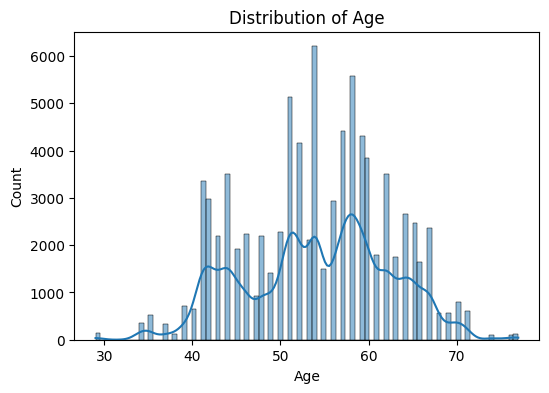

KeyboardInterrupt: 

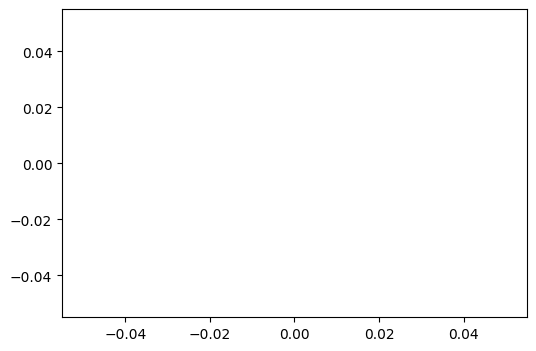

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observations**

- **ST Depression**
  - Highly right-skewed (`skew > 1`)
  - Large spike near `0`
  - Long right tail extending beyond `6`
  - Interpretation:
  - Most patients show little or no ST depression
  - A small subset has very high ischemia
  - Next step:
  - Keep as-is for now and evaluate model output first
  - Consider a log transform later if needed

- **BP** (`skew = 0.63`)
  - Moderately right-skewed (`0.5-1` range)
  - Most values concentrated around `120-140`
  - Mild right tail present

- **Cholesterol** (`skew = 0.27`)
  - Nearly symmetric distribution
  - Although max reaches `564`, most values cluster around `200-300`

- **Age** (`skew = -0.16`)
  - Nearly symmetric
  - Slight left skew, indicating relatively more older than younger patients

- **Max HR** (`skew = -0.75`)
  - Moderately left-skewed
  - Most values concentrated around `150-170`
  - Fewer observations at lower heart-rate values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Print top correlations with target
target_corr = corr_matrix['Heart Disease'].sort_values(ascending=False)

print("Correlation with Target:")
print(target_corr)

# Optional heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Key Findings

---

### 1. Thallium is the Strongest Predictor
| Feature | Correlation |
|---|---|
| Thallium | **+0.61** |

- Highest positive correlation with Heart Disease.
- Thallium test result almost directly indicates disease presence.
- **The dataset is heavily driven by stress test findings.**

---

### 2. Max HR has a Strong Negative Correlation
| Feature | Correlation |
|---|---|
| Max HR | **−0.44** |

- Higher maximum heart rate → **lower disease probability**.
- Physiologically consistent: reduced HR capacity is a cardiac risk marker.

---

### 3. Cluster of Strong Cardiac / Stress-Test Features
The following features form a functionally related group — all exercise or stress-test derived:

| Feature | Nature |
|---|---|
| Chest pain type | Symptom-based |
| Exercise angina | Stress-test |
| ST depression | Stress-test |
| Slope of ST | Stress-test |
| Number of vessels (fluro) | Diagnostic |
| Thallium | Diagnostic |

> ⚠️ **Implication:** These features may carry redundant information. Consider dimensionality reduction or feature selection on this cluster.

---

### 4. BP and Cholesterol are Weak Linear Predictors
| Feature | Correlation |
|---|---|
| BP | **≈ 0.00** |
| Cholesterol | **+0.08** |

- Near-zero linear correlation with the target.
- **Does NOT mean they are useless** — non-linear models (trees, boosting) may still extract signal.
- Worth monitoring in feature importance post-modeling.

---

### 5. Multicollinearity Observations
| Feature Pair | Correlation |
|---|---|
| ST depression ↔ Slope of ST | **0.44** |
| Thallium ↔ Number of vessels | **0.33** |
| Exercise angina ↔ ST depression | **0.28** |
| Max HR ↔ several features | **Negative** |

> ⚠️ **Implication:** Moderate multicollinearity exists within the stress-test feature cluster. This matters for **Logistic Regression and SVM** (inflated coefficients) but is less of a concern for **tree-based models**. Consider VIF analysis before finalizing features for linear models.

---

| Insight | Action |
|---|---|
| Thallium dominates | Keep; monitor for data leakage if it's a post-diagnosis test |
| Stress-test cluster | Evaluate for redundancy via VIF / PCA |
| BP & Cholesterol weak | Retain for non-linear models; reconsider for linear |
| Multicollinearity present | Run VIF before Logistic Regression |

## VIF test

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = df.drop(columns=['id', 'Heart Disease'])



X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Remove constant row
vif_data = vif_data[vif_data["Feature"] != "const"]

# Sort by VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


> All VIF values are between 1.00 and 1.43.

- That means:
    - No multicollinearity problem.
    - Features are largely independent.
    - Logistic regression will be numerically stable.
    - We do not need to drop any feature for collinearity reasons.

In [ ]:
def numeric_feature_analysis(df, feature):
    summary = df.groupby('Heart Disease')[feature].agg(['mean', 'median', 'std'])
    print(f"\nSummary statistics for {feature} by Target:")
    print(summary)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f"{feature} vs Heart Disease")
    plt.show()

In [ ]:
numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for col in numeric_cols:
    numeric_feature_analysis(df, col)


# Bivariate Analysis — Numeric Features vs Heart Disease

---

## Summary Statistics

| Feature | Mean (No Disease) | Mean (Disease) | Median (No Disease) | Median (Disease) | Correlation |
|---|---|---|---|---|---|
| Age | 52.6 | 56.1 | 52 | 57 | +0.21 |
| BP | 130.57 | 130.41 | 130 | 130 | ~0.00 |
| Cholesterol | 242.5 | 248.1 | 239 | 246 | +0.08 |
| Max HR | 160.4 | 143.5 | 162 | 146 | −0.44 |
| ST Depression | 0.35 | 1.17 | 0.00 | 1.20 | +0.43 |

---

## Feature-by-Feature Interpretation

### Age
- Mean shifts from 52.6 → 56.1 and median from 52 → 57 across groups.
- Separation is visible but overlap is large across the age range.
- Moderate predictor; consistent with correlation of +0.21.

---

### BP (Blood Pressure)
- Mean: 130.57 vs 130.41. Median: 130 vs 130. Distributions are nearly identical.
- No linear separation between groups whatsoever.
- Confirms near-zero correlation. **BP alone will not be predictive.**
- May still contribute signal through interaction terms (e.g., BP × Age, BP × Cholesterol).

---

### Cholesterol
- Small upward shift: mean 242.5 → 248.1, median 239 → 246.
- Heavy distributional overlap; difference is statistically marginal.
- Clinically surprising given cholesterol's established role in cardiovascular disease — this is a dataset-driven reality, not a clinical contradiction.
- Weak linear predictor (correlation +0.08); non-linear models may extract limited additional signal.

---

### Max HR
- Clear downward shift: mean 160.4 → 143.5, median 162 → 146.
- Strongest separation among all numeric features alongside ST depression.
- Lower max HR is strongly associated with disease presence — physiologically, reduced cardiac capacity under stress is a well-established risk indicator.
- Consistent with correlation of −0.44. **One of the top numeric predictors.**

---

### ST Depression
- Large shift: mean 0.35 → 1.17, median 0.00 → 1.20.
- Distribution separation is visually obvious; disease group is clearly elevated.
- Largest absolute mean difference among all numeric features.
- Consistent with correlation of +0.43. **Likely a top-3 feature overall.**

---

## Predictor Strength Ranking

| Rank | Feature | Strength | Direction |
|---|---|---|---|
| 1 | ST Depression | Strong | Positive |
| 2 | Max HR | Strong | Negative |
| 3 | Age | Moderate | Positive |
| 4 | Cholesterol | Weak | Positive |
| 5 | BP | Negligible | None |

---

## Key Observations

**On overlap:**
Even for the two strongest features — ST depression and Max HR — considerable distributional overlap exists between disease and no-disease groups. Single-feature thresholding will not produce a reliable classifier. The model must combine multiple signals to achieve meaningful separation.

**On physiological coherence:**
ST depression and Max HR are both products of stress test performance. Their dominance reinforces the earlier finding that this dataset is structurally stress-test heavy. Features derived from resting measurements (BP, Cholesterol) carry far less discriminative power in this particular dataset.

**On interaction potential:**
BP and Cholesterol show negligible standalone signal but should not be discarded prematurely. Tree-based and boosting models may find interaction effects that linear correlation fails to capture.

In [ ]:
def categorical_feature_analysis(df, feature):
    cross_tab = pd.crosstab(df[feature], df['Heart Disease'], normalize='index')
    print(f"\nDisease proportion by {feature}:")
    print(cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{feature} vs Heart Disease (Proportion)")
    plt.ylabel("Proportion")
    plt.show()


In [ ]:
categorical_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium'
]

for col in categorical_cols:
    categorical_feature_analysis(df, col)


# Bivariate Analysis — Categorical Features vs Heart Disease

---

## Disease Rate by Category

### Thallium

| Value | Disease Rate |
|---|---|
| 3 | 19.8% |
| 6 | 68.6% |
| 7 | 81.5% |

Clear risk gradient across all three values. The jump from value 3 to 6 alone represents a ~50 percentage point increase in disease rate.

---

### Number of Vessels (Fluoroscopy)

| Vessels | Disease Rate |
|---|---|
| 0 | 30.0% |
| 1 | 73.0% |
| 2 | 89.7% |
| 3 | 89.9% |

Near-monotonic increase. The relationship is almost perfectly ordinal — each additional vessel blocked corresponds to a higher disease rate. The plateau between 2 and 3 vessels suggests diminishing marginal risk beyond 2 blocked vessels, but both remain high-risk categories.

---

### Exercise Angina

| Value | Disease Rate |
|---|---|
| No | 31.0% |
| Yes | 80.6% |

Binary feature with a ~50 percentage point separation. Among the cleanest splits in the dataset.

---

### Chest Pain Type

| Type | Disease Rate |
|---|---|
| 1 | 10.8% |
| 2 | 16.2% |
| 3 | 19.1% |
| 4 | 69.7% |

Types 1–3 cluster at low risk (10–19%). Type 4 (asymptomatic) breaks sharply to 69.7%. Counter-intuitive clinically — asymptomatic presentation is highest risk — but a well-documented phenomenon where silent ischemia masks symptoms.

---

### Slope of ST

| Slope | Disease Rate |
|---|---|
| 1 | 26.0% |
| 2 | 69.0% |
| 3 | 72.0% |

Large jump from slope 1 to slope 2. Values 2 and 3 converge, suggesting they may behave similarly in a model. Consider grouping 2 and 3 as a single high-risk category during feature engineering.

---

## Summary by Signal Strength

| Strength | Feature | Disease Rate Range | Spread |
|---|---|---|---|
| Extremely Strong | Number of Vessels | 30% → 89.9% | ~60 pp |
| Very Strong | Thallium | 19.8% → 81.5% | ~62 pp |
| Very Strong | Exercise Angina | 31% → 80.6% | ~50 pp |
| Strong | Chest Pain Type | 10.8% → 69.7% | ~59 pp |
| Strong | Slope of ST | 26% → 72% | ~46 pp |
| Moderate | Sex | 18% → 55% | ~37 pp |
| Moderate | EKG Results | 34% → 56% | ~22 pp |
| Weak | FBS over 120 | 44% → 50% | ~6 pp |

> pp = percentage points spread between lowest and highest category disease rate.

---

## Key Observations

**Dataset is structurally dominated by stress-test and imaging features.**
The five strongest categorical predictors — Thallium, Number of Vessels, Exercise Angina, Chest Pain Type, Slope of ST — are all derived from exercise stress testing or cardiac imaging. This is not coincidental; the dataset was likely assembled in a clinical setting where these investigations were the primary diagnostic workup.

**Classic cardiovascular risk factors are weak here.**
BP, Cholesterol (from numeric analysis), and FBS (6 pp spread) show minimal discriminative power. This does not contradict their clinical importance in general population risk — it reflects that this dataset's population has already been selected for cardiac investigation, compressing the variation in those features.

**FBS is a candidate for removal.**
A 6 percentage point spread between FBS groups is negligible. Unless interaction effects emerge during modeling, FBS carries almost no standalone predictive value and may add noise rather than signal.

**Ordinality matters for Number of Vessels and Slope of ST.**
Both features show directional trends that should be respected during encoding. Use `OrdinalEncoder` with explicit category ordering rather than `OneHotEncoder`, which would destroy the directional information.

**Chest Pain Type 4 warrants special attention.**
The sharp discontinuity between types 1–3 and type 4 suggests this feature may behave more like a binary flag (Type 4 vs. Not Type 4) than a true 4-level ordinal. Consider engineering a binary `is_asymptomatic` feature alongside the original.

In [ ]:
pd.crosstab(
    [df['Thallium'], df['Number of vessels fluro']],
    df['Heart Disease'],
    normalize='index'
)


# Interaction Analysis — Thallium × Number of Vessels

---

## Disease Probability by Combined Category

### Thallium = 3 (Low Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 13.6% |
| 1 | 42.9% |
| 2 | 70.1% |
| 3 | 70.5% |

Even within the lowest-risk Thallium category, vessel count drives disease probability from 13.6% to 70.5%. Number of vessels is the dominant driver within this segment.

---

### Thallium = 6 (Moderate Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 54.3% |
| 1 | 85.4% |
| 2 | 93.6% |
| 3 | 92.5% |

A compounding effect is visible. Thallium = 6 at zero vessels already places the patient at 54.3% risk — above the baseline for the entire dataset. Each additional vessel pushes probability toward the 90s.

---

### Thallium = 7 (High Risk)

| Vessels | Disease Rate |
|---|---|
| 0 | 70.0% |
| 1 | 91.3% |
| 2 | 96.6% |
| 3 | 96.7% |

Thallium = 7 with 2 or more vessels produces ~97% disease probability. This is near-deterministic classification from two features alone.

---

## Cross-Segment Summary

| Thallium | Vessels = 0 | Vessels = 1 | Vessels = 2 | Vessels = 3 |
|---|---|---|---|---|
| 3 | 13.6% | 42.9% | 70.1% | 70.5% |
| 6 | 54.3% | 85.4% | 93.6% | 92.5% |
| 7 | 70.0% | 91.3% | 96.6% | 96.7% |

The gradient runs in both directions simultaneously — across rows (Thallium effect) and down columns (Vessel effect). The interaction is multiplicative, not merely additive.

---

## Key Observations

**The interaction is stronger than either feature individually.**
Thallium alone achieves a correlation of 0.61. Number of vessels alone is similarly strong. But their combination produces near-perfect separation in the high-risk segments (Thallium 7, Vessels ≥ 2 → 97%). This level of separation cannot be explained by additive effects alone — a genuine multiplicative interaction exists.

**The dataset contains near-rule-based patterns.**
The segment Thallium = 7 and Vessels ≥ 2 is essentially a deterministic rule. This is a structurally important finding: parts of this dataset behave less like a probabilistic classification problem and more like a decision tree with hard boundaries. This has direct implications for model selection.

**Risk is almost monotonic within each Thallium level.**
Within Thallium = 3, 6, and 7, disease rate increases with vessel count with only minor non-monotonicity at the top end (Vessels 2 vs. 3 converge). This confirms that Number of Vessels should be treated as ordinal, not nominal.

---

## Modeling Implications

**Tree-based models are structurally aligned with this data.**
Gradient boosting and random forests discover interactions naturally through sequential splits. A model will likely split first on Thallium or Number of Vessels, then refine using the other — exactly mirroring the pattern observed here. This is why tree-based models are expected to dominate on this dataset.

**Logistic regression requires an explicit interaction term.**
Without `Thallium × Vessels` as an engineered feature, logistic regression assumes additive linear effects and will systematically underestimate risk in high-combined-risk segments. The interaction term must be explicitly constructed and included.

**Deep learning is likely unnecessary.**
When two features in combination produce ~97% disease probability in identifiable segments, the problem has strong rule-like structure that shallow models handle efficiently. Gradient boosting will almost certainly match or exceed neural network performance here, with substantially lower complexity and better interpretability.

---

## Feature Engineering Action

Based on this interaction, the following feature should be created before modeling:

```python
df['Thallium_x_Vessels'] = OneHot(df['Thallium']) * df['Number of vessels fluro']
```

This encodes the multiplicative relationship explicitly and ensures linear models can access the interaction signal without relying on the model to discover it implicitly.

In [ ]:
pd.crosstab(
    df['Exercise angina'],
    [pd.cut(df['ST depression'], bins=[-1, 0.5, 1.5, 10]), df['Heart Disease']],
    normalize='index'
)


# Feature Engineering — Feature Group Definitions

---

## Group Classification

| Feature | Group | Encoding Strategy | Rationale |
|---|---|---|---|
| `id` | Drop | — | Unique identifier, carries no predictive signal |
| `Age` | Numeric (Continuous) | StandardScaler | Continuous range, linear and non-linear signal possible |
| `BP` | Numeric (Continuous) | StandardScaler | Continuous, weak standalone signal but retained for interactions |
| `Cholesterol` | Numeric (Continuous) | StandardScaler | Continuous, weak linear signal; non-linear models may extract value |
| `Max HR` | Numeric (Continuous) | StandardScaler | Strong negative predictor; continuous range |
| `ST depression` | Numeric (Continuous) | StandardScaler | Strongest numeric predictor; float, right-skewed distribution |
| `Sex` | Binary | Keep as-is | Already 0/1 encoded, no transformation needed |
| `FBS over 120` | Binary | Keep as-is | Already 0/1 encoded |
| `Exercise angina` | Binary | Keep as-is | Already 0/1 encoded |
| `Chest pain type` | Nominal Categorical | OneHotEncoder | 4 unordered categories; no natural ranking between types |
| `EKG results` | Nominal Categorical | OneHotEncoder | Values 0/1/2 are labels, not a meaningful scale |
| `Slope of ST` | Nominal Categorical | OneHotEncoder | Values 1/2/3 show non-linear jump (1→2 large, 2→3 small); ordinal assumption unsafe |
| `Thallium` | Nominal Categorical | OneHotEncoder | Values 3/6/7 are non-consecutive labels, not a continuous scale |
| `Number of vessels fluro` | Ordinal Numeric | Keep as-is | 0–3 with near-monotonic risk increase; numeric ordering is meaningful |

---

## Notes on Key Decisions

**Slope of ST — Nominal, not Ordinal.**
Although values 1, 2, 3 suggest an ordering, EDA showed that the risk jump between slope 1 and slope 2 is large (~43 pp) while slope 2 and slope 3 are nearly identical (69% vs 72%). The relationship is non-linear and the ordinal assumption would misrepresent the spacing. OneHotEncoding is safer.

**Thallium — Nominal, not Ordinal.**
Values are 3, 6, and 7 — non-consecutive integers that represent distinct test result categories, not a continuous or evenly-spaced scale. Treating them as numeric would imply a false magnitude relationship (7 ≈ 2.3× the effect of 3), which is not supported by the data.

**Number of Vessels — Retained as Numeric.**
0 to 3 with a near-monotonic increase in disease rate confirmed in EDA. The integer ordering carries real meaning here, unlike Thallium or Slope of ST. Keeping it numeric preserves the ordinal signal without adding unnecessary columns.

**Binary Features — No transformation.**
Sex, FBS, and Exercise Angina are already in 0/1 form. Re-encoding them would produce identical results. Scaling is unnecessary since they are bounded [0, 1] by definition.

---

## Implementation

```python
# Feature group definitions
drop_cols       = ['id']

numeric_cols    = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

binary_cols     = ['Sex', 'FBS over 120', 'Exercise angina']

nominal_cols    = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

ordinal_cols    = ['Number of vessels fluro']

target_col      = 'Heart Disease'
```

```python
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ('numeric',  StandardScaler(),                numeric_cols),
    ('nominal',  OneHotEncoder(drop='first',
                               handle_unknown='ignore'), nominal_cols),
    ('binary',   'passthrough',                   binary_cols),
    ('ordinal',  'passthrough',                   ordinal_cols),
])
```

> `drop='first'` in OneHotEncoder removes one dummy column per feature to avoid multicollinearity (dummy variable trap). This is important for linear models; tree-based models are unaffected either way.

---

## What This Produces After Transformation

| Source | Original Columns | Output Columns |
|---|---|---|
| Numeric | 5 | 5 (scaled) |
| Nominal (OneHot) | 4 | ~10 (depending on cardinality) |
| Binary | 3 | 3 (passthrough) |
| Ordinal | 1 | 1 (passthrough) |
| **Total** | **13** | **~19** |

Final feature count will vary slightly based on exact cardinality of nominal columns after `drop='first'` is applied.

In [ ]:
# Feature group definitions
drop_cols       = ['id']

numeric_features = [
    'Age', 'BP', 'Cholesterol',
    'Max HR', 'ST depression'
]

binary_features = [
    'Sex', 'FBS over 120', 'Exercise angina'
]

categorical_features = [
    'Chest pain type',
    'EKG results',
    'Slope of ST',
    'Thallium'
]

ordinal_features = [
    'Number of vessels fluro'
]

target_col      = 'Heart Disease'

In [ ]:
df.drop(columns=drop_cols, inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [ ]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', 'passthrough', categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

print("Random Forest Report")
print(classification_report(y_val, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_rf))


In [ ]:
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Validation Accuracy:", rf_model.score(X_val, y_val))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

lgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1
    ))
])

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_val)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]

print("LightGBM Report")
print(classification_report(y_val, y_pred_lgb))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_lgb))


In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
# Separate id
test_ids = test['id']

# Drop id from features
X_test = test.drop(columns=['id'])


In [ ]:
test_probs = lgb_model.predict_proba(X_test)[:, 1]


In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_probs
})

submission.to_csv("lgb_9559.csv", index=False)


In [ ]:
lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1,
        device='gpu'
    ))
])

In [ ]:
Bhavik

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Original X and y
X_base = df.drop(columns=['Heart Disease'])
y_base = df['Heart Disease']

baseline_auc = cross_val_score(
    lgb_pipeline,  # your existing LightGBM pipeline
    X_base,
    y_base,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
).mean()

print("Baseline ROC-AUC:", baseline_auc)


In [ ]:
train_temp = df.copy()

train_temp['Thal_Vessel_num'] = (
    train_temp['Thallium'] *
    train_temp['Number of vessels fluro']
)


In [ ]:
numeric_features_new = numeric_features + ['Thal_Vessel_num']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_new),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

lgb_pipeline_new = Pipeline(steps=[
    ('preprocessor', preprocessor_new),
    ('model', LGBMClassifier(
        n_estimators=1600,
        learning_rate=0.02,
        max_depth=8,
        num_leaves=31,
        min_child_samples=40,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        n_jobs=-1,
        device='gpu'
    ))
])


NameError: name 'preprocessor_new' is not defined

In [ ]:
BHAVIK

In [ ]:
X_new = train_temp.drop(columns=['Heart Disease'])
y_new = train_temp['Heart Disease']

new_auc = cross_val_score(
    lgb_pipeline_new,
    X_new,
    y_new,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
).mean()

print("ROC-AUC with Thal_Vessel_num:", new_auc)
print("Improvement:", new_auc - baseline_auc)


In [ ]:
train_temp = df.copy()

train_temp['HR_gap'] = (
    (220 - train_temp['Age']) - train_temp['Max HR']
)


In [ ]:
numeric_features_new = numeric_features + ['HR_gap']
numeric_features = [
    'Age', 'BP', 'Cholesterol',
    'Max HR', 'ST depression'
]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_new),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

lgb_pipeline_new = Pipeline(steps=[
    ('preprocessor', preprocessor_new),
    ('model', LGBMClassifier(
        n_estimators=1600,
        learning_rate=0.02,
        max_depth=8,
        num_leaves=31,
        min_child_samples=40,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        n_jobs=-1,
        device='gpu'
    ))
])


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_new = train_temp.drop(columns=['Heart Disease'])
y_new = train_temp['Heart Disease']

new_auc = cross_val_score(
    lgb_pipeline_new,
    X_new,
    y_new,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1
).mean()

print("ROC-AUC with HR_gap:", new_auc)
print("Improvement:", new_auc - baseline_auc)


In [ ]:
cat_cols = [
    'Sex',
    'Chest pain type',
    'FBS over 120',
    'EKG results',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]


In [ ]:
train_cb = df.copy()

for col in cat_cols:
    train_cb[col] = train_cb[col].astype('category')

X_cb = train_cb.drop(columns=['Heart Disease'])
y_cb = train_cb['Heart Disease']


In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=5,
    border_count=128,
    random_seed=42,
    task_type='GPU',  # GPU enabled
    devices='0',
    verbose=200
)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import Pool
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X_cb))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_cb, y_cb)):

    X_tr, X_val = X_cb.iloc[train_idx], X_cb.iloc[val_idx]
    y_tr, y_val = y_cb.iloc[train_idx], y_cb.iloc[val_idx]

    train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
    val_pool = Pool(X_val, y_val, cat_features=cat_cols)

    model = cat_model.copy()
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=200)

    oof_preds[val_idx] = model.predict_proba(val_pool)[:, 1]

print("Native CatBoost GPU ROC-AUC:", roc_auc_score(y_cb, oof_preds))


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import numpy as np


In [ ]:
X_full = df.drop(columns=['Heart Disease'])
y_full = df['Heart Disease']

X_test_final = test.drop(columns=['id'])
test_ids = test['id']


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

test_preds = np.zeros(len(X_test_final))
oof_preds = np.zeros(len(X_full))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_full, y_full)):

    print(f"\nFold {fold+1}")

    X_tr, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
    y_tr, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

    # Base model
    base_model = LGBMClassifier(
        n_estimators=1600,
        learning_rate=0.02,
        max_depth=8,
        num_leaves=31,
        min_child_samples=40,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        n_jobs=-1
    )

    # Fit base model
    base_model.fit(X_tr, y_tr)

    # Calibrate using validation fold only
    calibrated_model = CalibratedClassifierCV(
        base_model,
        method='isotonic',
        cv='prefit'
    )

    calibrated_model.fit(X_val, y_val)

    # Store OOF predictions
    oof_preds[val_idx] = calibrated_model.predict_proba(X_val)[:, 1]

    # Predict on test
    test_preds += calibrated_model.predict_proba(X_test_final)[:, 1] / 5


In [ ]:
print("Calibrated OOF ROC-AUC:", roc_auc_score(y_full, oof_preds))


In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_preds
})

submission.to_csv("submission_calibrated_5fold.csv", index=False)


In [ ]:
BHAVIK

In [ ]:
import numpy as np

train_temp = df.copy()

train_temp['ST_log'] = np.log1p(train_temp['ST depression'])


In [ ]:
cat_cols = [
    'Sex',
    'Chest pain type',
    'FBS over 120',
    'EKG results',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

train_temp_cb = train_temp.copy()

for col in cat_cols:
    train_temp_cb[col] = train_temp_cb[col].astype('category')

X_cb = train_temp_cb.drop(columns=['Heart Disease'])
y_cb = train_temp_cb['Heart Disease']


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X_cb))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_cb, y_cb)):

    X_tr, X_val = X_cb.iloc[train_idx], X_cb.iloc[val_idx]
    y_tr, y_val = y_cb.iloc[train_idx], y_cb.iloc[val_idx]

    train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
    val_pool = Pool(X_val, y_val, cat_features=cat_cols)

    model = CatBoostClassifier(
        iterations=2000,
        learning_rate=0.03,
        depth=8,
        l2_leaf_reg=5,
        task_type='GPU',
        devices='0',
        random_seed=42,
        verbose=0
    )

    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=200)

    oof_preds[val_idx] = model.predict_proba(val_pool)[:, 1]

print("CatBoost + ST_log ROC-AUC:", roc_auc_score(y_cb, oof_preds))


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [ ]:
X = df.drop(columns=[ 'Heart Disease'])
y = df['Heart Disease']

X_test = test.drop(columns=['id'])
test_ids = test['id']


In [ ]:
def get_lgb():
    return LGBMClassifier(
        n_estimators=1600,
        learning_rate=0.02,
        max_depth=8,
        num_leaves=31,
        min_child_samples=40,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        device="gpu",
        gpu_platform_id=0,
        gpu_device_id=0
    )
def get_xgb():
    return XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss',
        tree_method='hist',
        device='cuda'
    )
def get_cat():
    return CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0,
        task_type="GPU",
        devices='0'
    )


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(X))
oof_xgb = np.zeros(len(X))
oof_cat = np.zeros(len(X))

test_lgb = np.zeros(len(X_test))
test_xgb = np.zeros(len(X_test))
test_cat = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):

    print(f"\nFold {fold+1}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ---- LightGBM ----
    lgb = get_lgb()
    lgb.fit(X_tr, y_tr)

    oof_lgb[val_idx] = lgb.predict_proba(X_val)[:, 1]
    test_lgb += lgb.predict_proba(X_test)[:, 1] / 5

    # ---- XGBoost ----
    xgb = get_xgb()
    xgb.fit(X_tr, y_tr)

    oof_xgb[val_idx] = xgb.predict_proba(X_val)[:, 1]
    test_xgb += xgb.predict_proba(X_test)[:, 1] / 5

    # ---- CatBoost ----
    cat = get_cat()
    cat.fit(X_tr, y_tr)

    oof_cat[val_idx] = cat.predict_proba(X_val)[:, 1]
    test_cat += cat.predict_proba(X_test)[:, 1] / 5


In [ ]:
print("LGB OOF AUC:", roc_auc_score(y, oof_lgb))
print("XGB OOF AUC:", roc_auc_score(y, oof_xgb))
print("CAT OOF AUC:", roc_auc_score(y, oof_cat))


In [ ]:
# Stack base predictions
stacked_train = np.column_stack((oof_lgb, oof_xgb, oof_cat))
stacked_test = np.column_stack((test_lgb, test_xgb, test_cat))

meta_model = HistGradientBoostingClassifier(
    max_depth=3,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

meta_model.fit(stacked_train, y)

stacked_oof = meta_model.predict_proba(stacked_train)[:, 1]

print("Stacked OOF ROC-AUC:", roc_auc_score(y, stacked_oof))


In [ ]:
final_test_preds = meta_model.predict_proba(stacked_test)[:, 1]

submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': final_test_preds
})

submission.to_csv("submission_stacked_hist.csv", index=False)


In [ ]:
# Refit on full training data
lgb_final = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1
    ))
])

lgb_final.fit(X, y)


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
# Separate id
test_ids = test['id']

# Drop id from features
X_test = test.drop(columns=['id'])


In [ ]:
test_probs = lgb_final.predict_proba(X_test)[:, 1]


In [ ]:
submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_probs
})

submission.to_csv("submission.csv", index=False)


In [ ]:
print("Train Accuracy:", lgb_model.score(X_train, y_train))
print("Validation Accuracy:", lgb_model.score(X_val, y_val))

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0.1, 0.9, 17)

results = []

for t in thresholds:
    y_pred_thresh = (y_prob_lgb >= t).astype(int)

    precision = precision_score(y_val, y_pred_thresh)
    recall = recall_score(y_val, y_pred_thresh)
    f1 = f1_score(y_val, y_pred_thresh)

    results.append((t, precision, recall, f1))

threshold_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1'])

print(threshold_df)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob_lgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_prob_lgb)

plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
# Fit preprocessor on training data
preprocessor_tree.fit(X_train)

# Transform train and validation
X_train_transformed = preprocessor_tree.transform(X_train)
X_val_transformed = preprocessor_tree.transform(X_val)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Define model pipeline
lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42,
        n_jobs=-1
    ))
])

# Stratified KFold
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Cross-validation
cv_results = cross_validate(
    lgb_pipeline,
    X,
    y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Print results
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()} Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        tree_method='hist'
    ))
])


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results_xgb = cross_validate(
    xgb_pipeline,
    X,
    y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

for metric in scoring:
    scores = cv_results_xgb[f'test_{metric}']
    print(f"{metric.upper()} Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


In [ ]:
# Fit first (already done)
lgb_pipeline.fit(X_train, y_train)

lgb_model_fitted = lgb_pipeline.named_steps['model']
feature_names = lgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract gain importance
importance = lgb_model_fitted.booster_.feature_importance(importance_type='gain')

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(15))


In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_final = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        tree_method='hist'
    ))
])


In [ ]:
# X and y were defined earlier
# X = train.drop(columns=['id', 'Heart Disease'])
# y = train['Heart Disease']

xgb_final.fit(X, y)


In [ ]:
test_probs = xgb_final.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_probs
})

submission.to_csv("submission_2.csv", index=False)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

lgb_tune_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', LGBMClassifier(
        random_state=42,
        n_jobs=-1
    ))
])
param_dist = {
    'model__num_leaves': [31, 50, 70, 100],
    'model__max_depth': [-1, 6, 8, 10],
    'model__learning_rate': [0.01, 0.02, 0.03, 0.05],
    'model__n_estimators': [800, 1200, 1600],
    'model__min_child_samples': [20, 40, 60],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [0, 0.1, 0.5]
}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    lgb_tune_pipeline,
    param_distributions=param_dist,
    n_iter=25,  # increase to 50 if time allows
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best ROC-AUC:", random_search.best_score_)
print("Best Params:", random_search.best_params_)


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storage
oof_lgb = np.zeros(len(X))
oof_xgb = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):

    X_tr, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Fit LGB
    lgb_pipeline.fit(X_tr, y_tr)
    oof_lgb[val_idx] = lgb_pipeline.predict_proba(X_val_fold)[:, 1]

    # Fit XGB
    xgb_pipeline.fit(X_tr, y_tr)
    oof_xgb[val_idx] = xgb_pipeline.predict_proba(X_val_fold)[:, 1]

# Individual CV scores
print("LGB OOF ROC-AUC:", roc_auc_score(y, oof_lgb))
print("XGB OOF ROC-AUC:", roc_auc_score(y, oof_xgb))


In [ ]:
# Simple 50-50 blend
oof_avg = 0.5 * oof_lgb + 0.5 * oof_xgb

print("Blended ROC-AUC:", roc_auc_score(y, oof_avg))


In [ ]:
for w in [0.3, 0.4, 0.5, 0.6, 0.7]:
    blend = w * oof_lgb + (1 - w) * oof_xgb
    print(f"LGB weight {w:.1f} → ROC-AUC:", roc_auc_score(y, blend))


In [ ]:
# Train full models
lgb_pipeline.fit(X, y)
xgb_pipeline.fit(X, y)

# Predict on test
lgb_test = lgb_pipeline.predict_proba(X_test)[:, 1]
xgb_test = xgb_pipeline.predict_proba(X_test)[:, 1]

# Blend
test_blend = 0.3 * lgb_test + 0.7 * xgb_test

submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_blend
})

submission.to_csv("submission_3.csv", index=False)


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0
    ))
])


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results_cat = cross_validate(
    cat_pipeline,
    X,
    y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

for metric in scoring:
    scores = cv_results_cat[f'test_{metric}']
    print(f"{metric.upper()} Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


In [ ]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

cat_final = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0
    ))
])


In [ ]:
cat_final.fit(X, y)

In [ ]:
test_probs = cat_final.predict_proba(X_test)[:, 1]

In [ ]:
import pandas as pd

submission = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': test_probs
})

submission.to_csv("cat_boost.csv", index=False)


In [ ]:
def add_engineered_features(df):
    df = df.copy()

    # 1. HR gap
    df['HR_gap'] = (220 - df['Age']) - df['Max HR']

    # 2. ST × Angina
    df['ST_angina'] = df['ST depression'] * df['Exercise angina']

    # 3. Vessels × ST
    df['Vessel_ST'] = df['Number of vessels fluro'] * df['ST depression']

    # 4. Age × ST
    df['Age_ST'] = df['Age'] * df['ST depression']

    return df

# Apply
train_fe = add_engineered_features(df)
test_fe = add_engineered_features(test)


In [ ]:
numeric_features_extended = numeric_features + [
    'HR_gap',
    'ST_angina',
    'Vessel_ST',
    'Age_ST'
]

In [ ]:
X_fe = train_fe.drop(columns=['Heart Disease'])
y = train_fe['Heart Disease']


In [ ]:
numeric_features_extended = [
    'Age', 'BP', 'Cholesterol',
    'Max HR', 'ST depression',
    'HR_gap', 'ST_angina',
    'Vessel_ST', 'Age_ST'
]

binary_features = [
    'Sex', 'FBS over 120', 'Exercise angina'
]

categorical_features = [
    'Chest pain type',
    'EKG results',
    'Slope of ST',
    'Thallium'
]

ordinal_features = [
    'Number of vessels fluro'
]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor_tree_fe = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_extended),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features),
        ('ord', 'passthrough', ordinal_features)
    ]
)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

lgb_pipeline_fe = Pipeline(steps=[
    ('preprocessor', preprocessor_tree_fe),
    ('model', LGBMClassifier(
        n_estimators=1600,
        learning_rate=0.02,
        max_depth=8,
        num_leaves=31,
        min_child_samples=40,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
from xgboost import XGBClassifier

xgb_pipeline_fe = Pipeline(steps=[
    ('preprocessor', preprocessor_tree_fe),
    ('model', XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        tree_method="hist",
        predictor="gpu_predictor"
    ))
])


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat_pipeline_fe = Pipeline(steps=[
    ('preprocessor', preprocessor_tree_fe),
    ('model', CatBoostClassifier(
        iterations=1500,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0,
        task_type="GPU"
    ))
])


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(X_fe))
oof_xgb = np.zeros(len(X_fe))
oof_cat = np.zeros(len(X_fe))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_fe, y)):

    X_tr, X_val_fold = X_fe.iloc[train_idx], X_fe.iloc[val_idx]
    y_tr, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # LightGBM
    lgb_pipeline_fe.fit(X_tr, y_tr)
    oof_lgb[val_idx] = lgb_pipeline_fe.predict_proba(X_val_fold)[:, 1]

    # XGBoost
    xgb_pipeline_fe.fit(X_tr, y_tr)
    oof_xgb[val_idx] = xgb_pipeline_fe.predict_proba(X_val_fold)[:, 1]

    # CatBoost
    cat_pipeline_fe.fit(X_tr, y_tr)
    oof_cat[val_idx] = cat_pipeline_fe.predict_proba(X_val_fold)[:, 1]

print("LGB OOF AUC:", roc_auc_score(y, oof_lgb))
print("XGB OOF AUC:", roc_auc_score(y, oof_xgb))
print("CAT OOF AUC:", roc_auc_score(y, oof_cat))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Stack predictions as features
stacked_features = np.column_stack((oof_lgb, oof_xgb, oof_cat))

meta_model = LogisticRegression()
meta_model.fit(stacked_features, y)

# Predict stacked probabilities
stacked_preds = meta_model.predict_proba(stacked_features)[:, 1]

print("Stacked ROC-AUC:", roc_auc_score(y, stacked_preds))


In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

from lightgbm import LGBMClassifier



def objective_lgb(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 128),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 2.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 2.0),
        "device": "gpu",
        "random_state": 42,
        "n_jobs": -1,
        "verbosity":-1
    }

    oof = np.zeros(len(X))

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = LGBMClassifier(**params)
        model.fit(X_tr, y_tr)

        oof[val_idx] = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof)

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=30)

print("Best LGB AUC:", study_lgb.best_value)
print("Best LGB Params:", study_lgb.best_params)


[I 2026-02-18 17:12:02,262] A new study created in memory with name: no-name-58b318ea-ca00-4216-a31f-2b3d50e23949
[I 2026-02-18 17:18:48,119] Trial 0 finished with value: 0.955305476358828 and parameters: {'n_estimators': 1661, 'learning_rate': 0.012503626241860565, 'num_leaves': 31, 'max_depth': 6, 'min_child_samples': 43, 'subsample': 0.643072395692159, 'colsample_bytree': 0.7211161958467457, 'reg_alpha': 1.0504857541588257, 'reg_lambda': 0.11946226125639381}. Best is trial 0 with value: 0.955305476358828.
[I 2026-02-18 17:23:50,126] Trial 1 finished with value: 0.9548460325571176 and parameters: {'n_estimators': 1145, 'learning_rate': 0.03643206249855194, 'num_leaves': 76, 'max_depth': 11, 'min_child_samples': 94, 'subsample': 0.9705607967901937, 'colsample_bytree': 0.8288953618856563, 'reg_alpha': 0.11087431065773923, 'reg_lambda': 0.8453749001584694}. Best is trial 0 with value: 0.955305476358828.
[I 2026-02-18 17:30:42,828] Trial 2 finished with value: 0.954399185433991 and param

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

def objective_xgb(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 2.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 2.0),
        "tree_method": "hist",
        "random_state": 42,
        "eval_metric": "logloss"
    }

    oof = np.zeros(len(X))

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = XGBClassifier(**params)
        model.fit(X_tr, y_tr)

        oof[val_idx] = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=30)

print("Best XGB AUC:", study_xgb.best_value)
print("Best XGB Params:", study_xgb.best_params)


[I 2026-02-18 14:57:46,528] A new study created in memory with name: no-name-e4aba5e9-2269-4f79-8a94-98cecdb875d3
[I 2026-02-18 15:01:09,770] Trial 0 finished with value: 0.9554795423760252 and parameters: {'n_estimators': 972, 'learning_rate': 0.08233334476657686, 'max_depth': 3, 'subsample': 0.6967792979720865, 'colsample_bytree': 0.7773146292728021, 'reg_alpha': 1.911349598671315, 'reg_lambda': 0.6194119678307304}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:06:37,453] Trial 1 finished with value: 0.9551940251487949 and parameters: {'n_estimators': 1259, 'learning_rate': 0.022349124144720414, 'max_depth': 6, 'subsample': 0.999472400700091, 'colsample_bytree': 0.9298525733469147, 'reg_alpha': 1.6204530571916198, 'reg_lambda': 1.3587839803793427}. Best is trial 0 with value: 0.9554795423760252.
[I 2026-02-18 15:14:06,510] Trial 2 finished with value: 0.95392033438131 and parameters: {'n_estimators': 1650, 'learning_rate': 0.07844502049496534, 'max_depth': 6, 'subs

KeyboardInterrupt: 

In [ ]:
# ===============================
# Prepare Data for CatBoost
# ===============================

train_cb = df.copy()
test_cb = df.copy()

cat_cols = [
    'Sex',
    'Chest pain type',
    'FBS over 120',
    'EKG results',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

# Convert categorical columns to string (CatBoost best practice)
for col in cat_cols:
    train_cb[col] = train_cb[col].astype(str)
    test_cb[col] = test_cb[col].astype(str)

X_cb = train_cb.drop(columns=['Heart Disease'])
y_cb = train_cb['Heart Disease']


In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 7.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

def objective_cat(trial):

    params = {
        "iterations": trial.suggest_int("iterations", 800, 2500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 5),
        "random_strength": trial.suggest_float("random_strength", 0, 5),
        "task_type": "GPU",
        "thread_count": -1,
        "random_seed": 42,
        "verbose": 0
    }

    oof = np.zeros(len(X_cb))

    for train_idx, val_idx in skf.split(X_cb, y_cb):

        X_tr, X_val = X_cb.iloc[train_idx], X_cb.iloc[val_idx]
        y_tr, y_val = y_cb.iloc[train_idx], y_cb.iloc[val_idx]

        train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
        val_pool = Pool(X_val, y_val, cat_features=cat_cols)

        model = CatBoostClassifier(**params)
        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=200)

        oof[val_idx] = model.predict_proba(val_pool)[:, 1]

    return roc_auc_score(y_cb, oof)


In [ ]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=30)

print("Best CAT AUC:", study_cat.best_value)
print("Best CAT Params:", study_cat.best_params)


[I 2026-02-18 17:42:24,836] A new study created in memory with name: no-name-64701059-412c-4e17-9a30-6e22a143309e
[I 2026-02-18 17:53:53,184] Trial 0 finished with value: 0.9544202929163217 and parameters: {'iterations': 2172, 'learning_rate': 0.0218482944613365, 'depth': 9, 'l2_leaf_reg': 9.396329959813366, 'bagging_temperature': 3.099469803502721, 'random_strength': 0.012231691554029367}. Best is trial 0 with value: 0.9544202929163217.
[I 2026-02-18 18:00:27,302] Trial 1 finished with value: 0.9543542550265347 and parameters: {'iterations': 1150, 'learning_rate': 0.04805787092429408, 'depth': 10, 'l2_leaf_reg': 6.696332007035034, 'bagging_temperature': 2.1976232762203396, 'random_strength': 2.850698220141567}. Best is trial 0 with value: 0.9544202929163217.
[I 2026-02-18 18:03:35,657] Trial 2 finished with value: 0.9552393173320962 and parameters: {'iterations': 1113, 'learning_rate': 0.033106918233468, 'depth': 4, 'l2_leaf_reg': 4.522632273127602, 'bagging_temperature': 0.6174603643

KeyboardInterrupt: 

XGBOOST is done

In [ ]:
from lightgbm import LGBMClassifier

lgb_final = LGBMClassifier(
    n_estimators=1661,
    learning_rate=0.012503626241860565,
    num_leaves=31,
    max_depth=6,
    min_child_samples=43,
    subsample=0.643072395692159,
    colsample_bytree=0.7211161958467457,
    reg_alpha=1.0504857541588257,
    reg_lambda=0.11946226125639381,
    random_state=42,
    n_jobs=-1
)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_lgb = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):

    print(f"Fold {fold+1}")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = lgb_final
    model.fit(X_tr, y_tr)

    oof_lgb[val_idx] = model.predict_proba(X_val)[:, 1]

print("Final LGBM OOF ROC-AUC:", roc_auc_score(y, oof_lgb))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Final LGBM OOF ROC-AUC: 0.9553036375353533


In [ ]:
lgb_final.fit(X, y)


LGBMClassifier(colsample_bytree=0.7211161958467457,
               learning_rate=0.012503626241860565, max_depth=6,
               min_child_samples=43, n_estimators=1661, n_jobs=-1,
               random_state=42, reg_alpha=1.0504857541588257,
               reg_lambda=0.11946226125639381, subsample=0.643072395692159)

In [ ]:
test_probs_lgb = lgb_final.predict_proba(X_test)[:, 1]

submission_lgb = pd.DataFrame({
    "id": test_ids,
    "Heart Disease": test_probs_lgb
})

submission_lgb.to_csv("submission_lgb_optuna_final.csv", index=False)


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_final = CatBoostClassifier(
    iterations=2443,
    learning_rate=0.028617286398439353,
    depth=6,
    l2_leaf_reg=3.5313325975665264,
    bagging_temperature=0.5274409717782269,
    random_strength=0.03843459373261249,
    task_type="GPU",
    thread_count=-1,
    random_seed=42,
    verbose=0
)


In [ ]:
# Make fresh copies
train_cb = df.copy()
test_cb = test.copy()

# Define categorical columns
cat_cols = [
    'Sex',
    'Chest pain type',
    'FBS over 120',
    'EKG results',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

# Convert categorical columns to string (recommended for CatBoost)
for col in cat_cols:
    train_cb[col] = train_cb[col].astype(str)
    test_cb[col] = test_cb[col].astype(str)

# Define X and y
X_cb = train_cb.drop(columns=['Heart Disease'])
y_cb = train_cb['Heart Disease']

X_test_cb = test_cb.drop(columns=['id'])
test_ids = test_cb['id']


In [ ]:
from catboost import Pool

oof_cat = np.zeros(len(X_cb))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_cb, y_cb)):

    print(f"Fold {fold+1}")

    X_tr, X_val = X_cb.iloc[train_idx], X_cb.iloc[val_idx]
    y_tr, y_val = y_cb.iloc[train_idx], y_cb.iloc[val_idx]

    train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
    val_pool = Pool(X_val, y_val, cat_features=cat_cols)

    model = cat_final
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=200)

    oof_cat[val_idx] = model.predict_proba(val_pool)[:, 1]

print("Final CatBoost OOF ROC-AUC:", roc_auc_score(y_cb, oof_cat))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Final CatBoost OOF ROC-AUC: 0.9554481745032924


In [ ]:
full_train_pool = Pool(X_cb, y_cb, cat_features=cat_cols)
cat_final.fit(full_train_pool)


CatBoostClassifier(bagging_temperature=0.5274409717782269, depth=6, iterations=2443, l2_leaf_reg=3.5313325975665264, learning_rate=0.028617286398439353, random_seed=42, random_strength=0.03843459373261249, task_type='GPU', verbose=0)

In [ ]:
from catboost import Pool

test_pool = Pool(X_test_cb, cat_features=cat_cols)

test_probs_cat = cat_final.predict_proba(test_pool)[:, 1]

submission_cat = pd.DataFrame({
    "id": test_ids,
    "Heart Disease": test_probs_cat
})

submission_cat.to_csv("submission_cat_optuna_final.csv", index=False)
